In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras
from tqdm import tqdm

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

Data_path = "/kaggle/input/american-sign-language/ASL_Dataset/Train/"
Pred_path = "/kaggle/input/american-sign-language/ASL_Dataset/Test/"



In [3]:
for folder in  os.listdir(Data_path ) : 
    files = gb.glob(pathname= str( Data_path + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 5996 in folder N
For training data , found 5966 in folder R
For training data , found 5886 in folder Space
For training data , found 5996 in folder B
For training data , found 5996 in folder I
For training data , found 5996 in folder F
For training data , found 5996 in folder H
For training data , found 5996 in folder E
For training data , found 4542 in folder U
For training data , found 5996 in folder M
For training data , found 5996 in folder X
For training data , found 5996 in folder K
For training data , found 5996 in folder Q
For training data , found 5720 in folder Y
For training data , found 5996 in folder S
For training data , found 5996 in folder G
For training data , found 5996 in folder A
For training data , found 5996 in folder O
For training data , found 5648 in folder T
For training data , found 5996 in folder V
For training data , found 5996 in folder Z
For training data , found 5996 in folder C
For training data , found 5996 in folder P
For tra

In [4]:
for folder in  os.listdir(Pred_path ) : 
    files = gb.glob(pathname= str( Pred_path  + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 4 in folder N
For testing data , found 4 in folder R
For testing data , found 4 in folder Space
For testing data , found 4 in folder B
For testing data , found 4 in folder I
For testing data , found 4 in folder F
For testing data , found 4 in folder H
For testing data , found 4 in folder E
For testing data , found 4 in folder U
For testing data , found 4 in folder M
For testing data , found 4 in folder X
For testing data , found 4 in folder K
For testing data , found 4 in folder Q
For testing data , found 4 in folder Y
For testing data , found 4 in folder S
For testing data , found 4 in folder G
For testing data , found 4 in folder A
For testing data , found 4 in folder O
For testing data , found 4 in folder T
For testing data , found 4 in folder V
For testing data , found 4 in folder Z
For testing data , found 4 in folder C
For testing data , found 4 in folder P
For testing data , found 4 in folder L
For testing data , found 4 in folder W
For testing data , fo

In [5]:
code = {'A':0 ,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,'N':13,'Nothing':14,'O':15,'P':16,'Q':17,'R':18,'S':19,'Space':20,'T':21,'U':22,'V':23,'W':24,'X':25,'Y':26,'Z':27}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

In [6]:
s = 64

In [7]:
X_Data = []
y_Data = []
for folder in  tqdm(os.listdir(Data_path )) : 
    files = gb.glob(pathname= str( Data_path + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_Data.append(list(image_array))
        y_Data.append(code[folder])

100%|██████████| 28/28 [31:51<00:00, 68.27s/it]


In [8]:
print(f'we have {len(X_Data)} items in X_Data')

we have 165670 items in X_Data


In [29]:
X_Pred = []
y_Pred = []
for folder in  tqdm(os.listdir(Pred_path )) : 
    files = gb.glob(pathname= str( Pred_path + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_Pred.append(list(image_array))
        y_Pred.append(code[folder])

100%|██████████| 28/28 [00:01<00:00, 19.26it/s]


In [30]:
print(f'we have {len(X_Pred)} items in X_Pred')

we have 112 items in X_Pred


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_Data, y_Data,test_size = 0.20)

In [10]:
print(np.array(X_train).shape)
print(np.array(y_train).shape)
print(np.array(X_test).shape)
print(np.array(y_test).shape)


(132536, 64, 64, 3)
(132536,)
(33134, 64, 64, 3)
(33134,)


In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_Data[i])   
    plt.axis('off')
    plt.title(getcode(y_Data[i]))

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_Data),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_Data[i])    
    plt.axis('off')
    plt.title(getcode(y_Data[i]))

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

In [11]:
X_train = np.array(X_train)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')

print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (132536, 64, 64, 3)
X_test shape  is (33134, 64, 64, 3)
y_train shape  is (132536,)
y_test shape  is (33134,)


In [38]:
X_Pred = np.array(X_Pred)
y_Pred=np.array(y_Pred)



print(f'X_Pred shape  is {X_Pred.shape}')
print(f'y_Pred shape  is {y_Pred.shape}')


X_Pred shape  is (112, 64, 64, 3)
y_Pred shape  is (112,)


In [21]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),    
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(128,activation='relu') ,    

        keras.layers.Dense(28,activation='softmax') ,    
        ])

In [22]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 128)       3584      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        73792     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 576)               0         
                                                                 
 dense_4 (Dense)             (Non

In [24]:

ThisModel = KerasModel.fit(X_train, y_train, epochs=10,verbose=1,batch_size=64,validation_data=(X_test,y_test))

Epoch 1/10
2071/2071 [==============================] - 477s 230ms/step - loss: 0.4011 - accuracy: 0.9109 - val_loss: 0.0122 - val_accuracy: 0.9964
Epoch 2/10
2071/2071 [==============================] - 470s 227ms/step - loss: 0.0306 - accuracy: 0.9904 - val_loss: 0.0193 - val_accuracy: 0.9946
Epoch 3/10
2071/2071 [==============================] - 470s 227ms/step - loss: 0.0251 - accuracy: 0.9925 - val_loss: 0.0216 - val_accuracy: 0.9944
Epoch 4/10
2071/2071 [==============================] - 467s 226ms/step - loss: 0.0193 - accuracy: 0.9950 - val_loss: 0.0302 - val_accuracy: 0.9900
Epoch 5/10
2071/2071 [==============================] - 468s 226ms/step - loss: 0.0141 - accuracy: 0.9963 - val_loss: 0.0059 - val_accuracy: 0.9983
Epoch 6/10
2071/2071 [==============================] - 471s 227ms/step - loss: 0.0152 - accuracy: 0.9963 - val_loss: 0.0027 - val_accuracy: 0.9993
Epoch 7/10
2071/2071 [==============================] - 469s 226ms/step - loss: 0.0148 - accuracy: 0.9967 - val_

In [25]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

1036/1036 [==============================] - 33s 31ms/step - loss: 0.0360 - accuracy: 0.9940
Test Loss is 0.036046240478754044
Test Accuracy is 0.9940242767333984


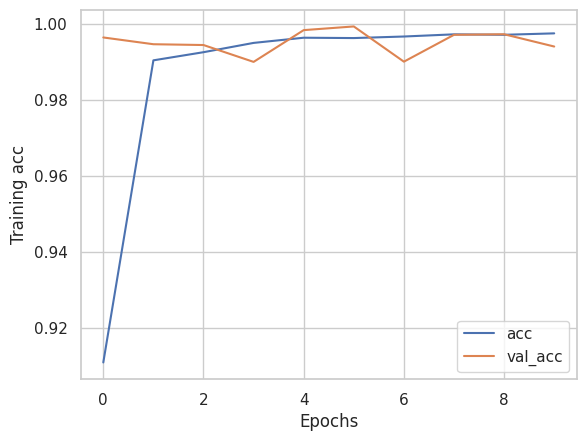

<Figure size 640x480 with 0 Axes>

In [32]:
plt.plot(ThisModel.history['accuracy'], label='acc')
plt.plot(ThisModel.history['val_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Training acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

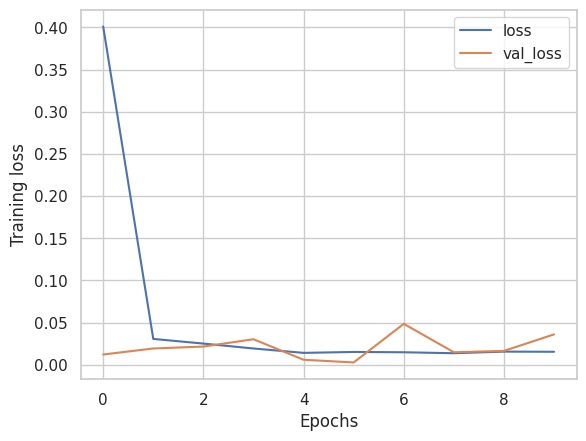

<Figure size 640x480 with 0 Axes>

In [33]:
plt.plot(ThisModel.history['loss'], label='loss')
plt.plot(ThisModel.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [39]:
y_result = KerasModel.predict(X_Pred)

print('Prediction Shape is {}'.format(y_result.shape))

4/4 [==============================] - 0s 32ms/step
Prediction Shape is (112, 28)


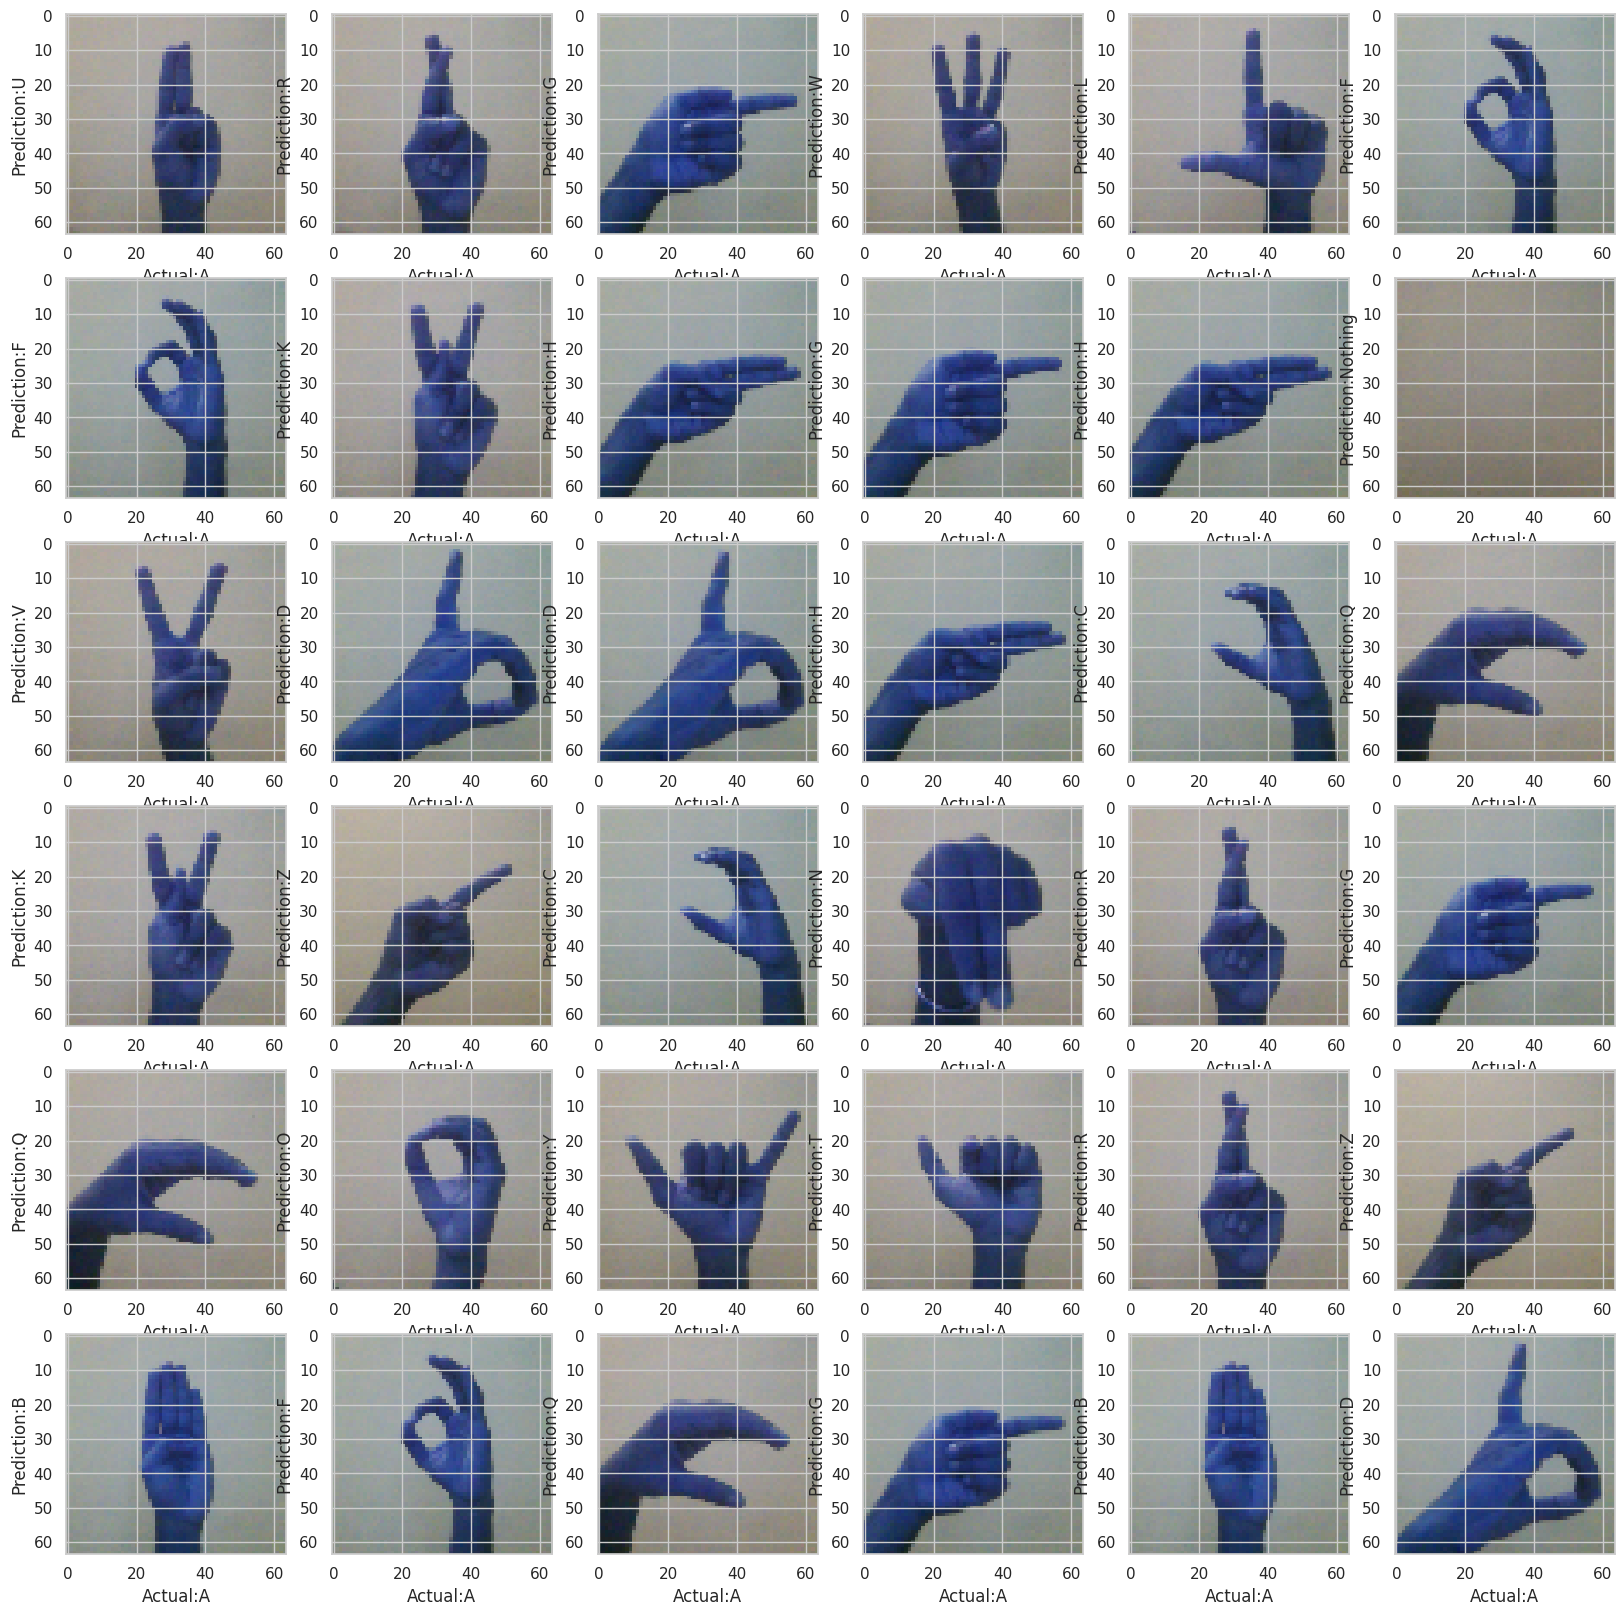

In [45]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_Pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_Pred[i])    
    plt.xlabel('Actual:'+str(getcode(np.argmax(y_Pred[i]))))
    plt.ylabel('Prediction:'+str(getcode(np.argmax(y_result[i]))))
   # plt.axis('off')
   # plt.title("Predicted : "+str(getcode(np.argmax(Y_pred[i])))+"\n"+"Actual : "+str(l[i]))